# Business: A local Business in Bangalore

Requirement:
We’ve collected over 11 customer reviews from Google. We want to understand what customers are happy or unhappy about (service, cleanliness, etc.).

Deliverables:
1. Clean and analyze the reviews
2. Classify sentiment (Positive, Neutral, Negative)
3. Identify top complaint areas
4. Deliver visual dashboard (in Power BI or Streamlit)
5. Share a PDF insights summary for management
   
Bonus: Use topic modeling (LDA) to cluster themes

## Step 1: Data Collection
Simulate review data if you don’t have real ones:
1. Use public datasets like Google Reviews on Kaggle
2. Scrape reviews (with permission) using SepAPI/BeautifulSoup/Selenium (optional)
    Using SerpAPI - Go to https://serpapi.com
    Sign up and get your free API key
   The free tier gives you 100 searches/month

### Python code to scrape Google Reviews using Selenium

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup Chrome with options
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Google Maps URL for Radhika Beauty Parlour
maps_url = "https://www.google.com/maps/place/Radhika+Beauty+Parlour/@12.9388344,77.6387658,12z/data=!4m10!1m2!2m1!1sradhika+beauty+parlour!3m6!1s0x3bae116ad9f48111:0x480b990dca891fbf!8m2!3d12.993053!4d77.6790856!15sChZyYWRoaWthIGJlYXV0eSBwYXJsb3VyWhgiFnJhZGhpa2EgYmVhdXR5IHBhcmxvdXKSAQxiZWF1dHlfc2Fsb26aASRDaGREU1VoTk1HOW5TMFZKUTBGblNVUlNNRnBoUTNoM1JSQUKqAWYKCS9tLzA1Njl6ZxABKhoiFnJhZGhpa2EgYmVhdXR5IHBhcmxvdXIoADIfEAEiG--zjoLqsMAjyxPqws0jrk0ArVi_XyL-wQ8DHDIaEAIiFnJhZGhpa2EgYmVhdXR5IHBhcmxvdXLgAQD6AQQIABBJ!16s%2Fg%2F11gbx9scwr?entry=ttu&g_ep=EgoyMDI1MDYyMy4yIKXMDSoASAFQAw%3D%3D"
driver.get(maps_url)
time.sleep(5)

# Click on "Reviews" button
try:
    review_button = driver.find_element(By.XPATH ,'//div[text()="Reviews"]')
    review_button.click()
    time.sleep(5)
except:
    print("❌ Could not click the Reviews button.")
    driver.quit()
    exit()

# Scroll the reviews pane to load more reviews
scrollable_div = driver.find_element(By.XPATH, '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')

for _ in range(10):  # Adjust number of scrolls
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrollable_div)
    time.sleep(2)

# Find all review text elements by your XPath
name_elements = driver.find_elements(By.XPATH, '//div[@class="d4r55 "]')
review_elements = driver.find_elements(By.XPATH, '//span[@class="wiI7pd"]')


reviews = [
    {"name": name.text.strip(), "review": review.text.strip()}
    for name, review in zip(name_elements, review_elements)
    if review.text.strip()
]


driver.quit()

# Save reviews to CSV
df = pd.DataFrame(reviews, columns=["name","review"])
df.to_csv("radhika_google_reviews.csv", index=False)
print(f"✅ Scraped {len(df)} reviews and saved to CSV.")


✅ Scraped 10 reviews and saved to CSV.


### Load the data

In [2]:
import pandas as pd

df = pd.read_csv("radhika_google_reviews.csv")
print(df.head())

                  name                                             review
0            Suvathi K  I am a regular customer after accidentally ent...
1  Bapitha Kumar singh  It's nice. They are doing saree drops, beauty ...
2            Keerthi K  Excellent experience. I have been coming here ...
3         Anitha Reddy      Prathima's service is very good and excellent
4                   ND  One of the worst parlour . Lot of negativity ....


## Step 2: Install and Import Sentiment Libraries and Run Sentiment Analysis
TextBlob (simple and good for small-scale)
- TextBlob is a Python library that understands English grammar and sentiment.
- Once a TextBlob is created, you can extract its sentiment.

In [3]:
#!pip install textblob

In [4]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text) #This creates a TextBlob object from the review text.
    polarity = blob.sentiment.polarity #This extracts the polarity score, which is a float value between -1.0 and 1.0:
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["review"].apply(get_sentiment)
df["polarity"] = df["review"].apply(lambda x: TextBlob(x).sentiment.polarity)


### Step 3: Save the sentiment to the new csv file

In [5]:
df.to_csv("radhika_reviews_with_sentiment.csv", index=False)
print("✅ Sentiment analysis complete and saved!")


✅ Sentiment analysis complete and saved!


### Step 4: Give the Sentiment Analysis Output 

In [6]:
print(df["sentiment"].value_counts())


sentiment
Positive    9
Negative    1
Name: count, dtype: int64


### Step 5: Visualization with Matplotlib

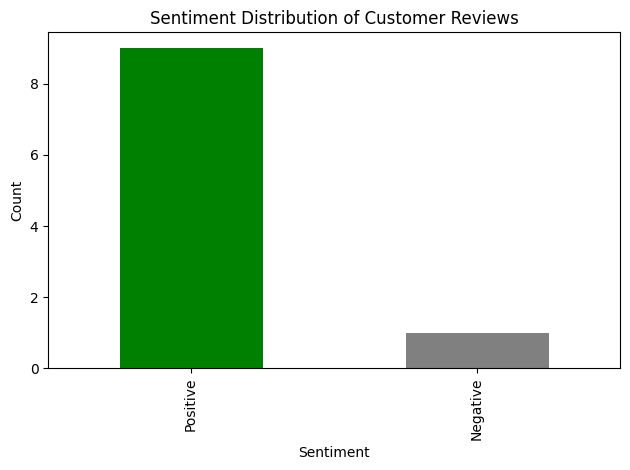

In [7]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Step 6: Create a dashboard using Streamlit

In [9]:
#open and write to the app.py file
code = """
# Your Streamlit code here...
"""
with open("app.py", "w") as f:
    f.write(code)

In [10]:
!pip install streamlit